### Bigger BLH = Larger Cells?

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [152]:
df = pd.read_csv('cloud_data_fft.csv')

In [153]:
df

name  year  month  day  minlat  maxlat  minlon  \
0        20190801-10-9-93-92  2019      8    1     -10      -9     -93   
1       20190801-11-10-93-92  2019      8    1     -11     -10     -93   
2       20190801-11-10-94-93  2019      8    1     -11     -10     -94   
3       20190801-11-10-95-94  2019      8    1     -11     -10     -95   
4       20190801-12-11-92-91  2019      8    1     -12     -11     -92   
...                      ...   ...    ...  ...     ...     ...     ...   
4105  20200731-32-33-124-123  2020      7   31      32      33    -124   
4106  20200731-32-33-125-124  2020      7   31      32      33    -125   
4107  20200731-32-33-126-125  2020      7   31      32      33    -126   
4108  20200731-33-34-124-123  2020      7   31      33      34    -124   
4109  20200731-33-34-125-124  2020      7   31      33      34    -125   

      maxlon  dc_component max_freq_indices  ...  high_freq_energy  \
0        -92    37830579.0       (221, 223)  ...      1.046816e+07   
1        -92    40852554.0       (221, 222)  ...      7.056395e+06   
2        -93    41574971.0       (223, 222)  ...      7.960701e+06   
3        -94    40938742.0       (221, 221)  ...      8.452198e+06   
4        -91    43218200.0       (220, 225)  ...      4.939230e+06   
...      ...           ...              ...  ...               ...   
4105    -123    33102683.0       (222, 221)  ...      1.276290e+07   
4106    -124    35535547.0       (221, 222)  ...      1.087080e+07   
4107    -125    33981984.0       (221, 222)  ...      1.012064e+07   
4108    -123    39329382.0       (221, 222)  ...      1.107600e+07   
4109    -124    35402147.0       (223, 222)  ...      1.293886e+07   

                                          radial_energy  \
0     [40373696.62543078, 82521831.41551267, 1255282...   
1     [42736233.174378216, 68996359.83513466, 998891...   
2     [43586380.63362832, 63995843.03421521, 9283758...   
3     [43986591.687649995, 68783243.3591963, 9434009...   
4     [44656382.905303195, 62505478.40736255, 877078...   
...                                                 ...   
4105  [37392133.337756276, 62770524.35555814, 949014...   
4106  [38205966.085841835, 57835945.34489278, 844846...   
4107  [37492518.79152407, 60094853.85756197, 8662032...   
4108  [41902453.838658914, 65534644.80879662, 981348...   
4109  [42397777.23399769, 72039024.87270707, 1029268...   

                                         dominant_phase mean_temperature  \
0     [40373696.62543078, 82521831.41551267, 1255282...        20.746210   
1     [42736233.174378216, 68996359.83513466, 998891...        20.261743   
2     [43586380.63362832, 63995843.03421521, 9283758...        20.540033   
3     [43986591.687649995, 68783243.3591963, 9434009...        20.851434   
4     [44656382.905303195, 62505478.40736255, 877078...        19.585199   
...                                                 ...              ...   
4105  [37392133.337756276, 62770524.35555814, 949014...        16.663141   
4106  [38205966.085841835, 57835945.34489278, 844846...        17.027673   
4107  [37492518.79152407, 60094853.85756197, 8662032...        17.336908   
4108  [41902453.838658914, 65534644.80879662, 981348...        15.856256   
4109  [42397777.23399769, 72039024.87270707, 1029268...        16.467981   

       mean_sst  mean_wind_speed  mean_wind_direction  boundry_layer_height  \
0     22.938684         8.567841           143.055145           1130.965820   
1     22.144006         9.062022           144.205750           1127.250854   
2     22.460138         9.110954           147.425095           1128.900879   
3     22.805017         9.097515           150.645004           1124.030884   
4     21.503961         9.354900           144.153030           1127.085815   
...         ...              ...                  ...                   ...   
4105  18.396631         8.682854           -64.506386            684.908386   
4106  18.620935         7.498250        

In [154]:
# Differentiating between the 2 areas (North Pacific and South Pacific)
df['area'] = df['minlon'].apply(lambda x: 'N' if -136 <= x <= -121 else 'S')
df['area'] = df['maxlon'].apply(lambda x: 'N' if -136 <= x <= -121 else 'S')

df

name  year  month  day  minlat  maxlat  minlon  \
0        20190801-10-9-93-92  2019      8    1     -10      -9     -93   
1       20190801-11-10-93-92  2019      8    1     -11     -10     -93   
2       20190801-11-10-94-93  2019      8    1     -11     -10     -94   
3       20190801-11-10-95-94  2019      8    1     -11     -10     -95   
4       20190801-12-11-92-91  2019      8    1     -12     -11     -92   
...                      ...   ...    ...  ...     ...     ...     ...   
4105  20200731-32-33-124-123  2020      7   31      32      33    -124   
4106  20200731-32-33-125-124  2020      7   31      32      33    -125   
4107  20200731-32-33-126-125  2020      7   31      32      33    -126   
4108  20200731-33-34-124-123  2020      7   31      33      34    -124   
4109  20200731-33-34-125-124  2020      7   31      33      34    -125   

      maxlon  dc_component max_freq_indices  ...  \
0        -92    37830579.0       (221, 223)  ...   
1        -92    40852554.0       (221, 222)  ...   
2        -93    41574971.0       (223, 222)  ...   
3        -94    40938742.0       (221, 221)  ...   
4        -91    43218200.0       (220, 225)  ...   
...      ...           ...              ...  ...   
4105    -123    33102683.0       (222, 221)  ...   
4106    -124    35535547.0       (221, 222)  ...   
4107    -125    33981984.0       (221, 222)  ...   
4108    -123    39329382.0       (221, 222)  ...   
4109    -124    35402147.0       (223, 222)  ...   

                                          radial_energy  \
0     [40373696.62543078, 82521831.41551267, 1255282...   
1     [42736233.174378216, 68996359.83513466, 998891...   
2     [43586380.63362832, 63995843.03421521, 9283758...   
3     [43986591.687649995, 68783243.3591963, 9434009...   
4     [44656382.905303195, 62505478.40736255, 877078...   
...                                                 ...   
4105  [37392133.337756276, 62770524.35555814, 949014...   
4106  [38205966.085841835, 57835945.34489278, 844846...   
4107  [37492518.79152407, 60094853.85756197, 8662032...   
4108  [41902453.838658914, 65534644.80879662, 981348...   
4109  [42397777.23399769, 72039024.87270707, 1029268...   

                                         dominant_phase mean_temperature  \
0     [40373696.62543078, 82521831.41551267, 1255282...        20.746210   
1     [42736233.174378216, 68996359.83513466, 998891...        20.261743   
2     [43586380.63362832, 63995843.03421521, 9283758...        20.540033   
3     [43986591.687649995, 68783243.3591963, 9434009...        20.851434   
4     [44656382.905303195, 62505478.40736255, 877078...        19.585199   
...                                                 ...              ...   
4105  [37392133.337756276, 62770524.35555814, 949014...        16.663141   
4106  [38205966.085841835, 57835945.34489278, 844846...        17.027673   
4107  [37492518.79152407, 60094853.85756197, 8662032...        17.336908   
4108  [41902453.838658914, 65534644.80879662, 981348...        15.856256   
4109  [42397777.23399769, 72039024.87270707, 1029268...        16.467981   

       mean_sst  mean_wind_speed  mean_wind_direction  boundry_layer_height  \
0     22.938684         8.567841           143.055145           1130.965820   
1     22.144006         9.062022           144.205750           1127.250854   
2     22.460138         9.110954           147.425095           1128.900879   
3     22.805017         9.097515           150.645004           1124.030884   
4     21.503961         9.354900           144.153030           1127.085815   
...         ...              ...                  ...                   ...   
4105  18.396631         8.682854           -64.506386            684.908386   
4106  18.620935         7.498250           -65.254028            759.648376   
4107  18.463525         6.503430           -63.608334            797.593384   
4108  17.551599         8.399295           -59.138657            645.578369   
4109  18.185815    

### Seperations to groups is needed ! ! ! 

In [155]:
df['max_freq_indices']
print(df['max_freq_indices'].apply(type).unique())

[<class 'str'>]


In [156]:
df['radial_energy'] = df['radial_energy'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x  # Convert string to list
)
df['radial_energy'] = df['radial_energy'].apply(
    lambda x: sum(x) / len(x) if isinstance(x, list) and len(x) > 0 else None  # Compute mean
)


df['dominant_phase'] = df['dominant_phase'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x  # Convert string to list
)
df['dominant_phase'] = df['dominant_phase'].apply(
    lambda x: sum(x) / len(x) if isinstance(x, list) and len(x) > 0 else None  # Compute mean
)


df['max_freq_indices'] = df['max_freq_indices'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x  # Convert string to list
)
df['max_freq_indices'] = df['max_freq_indices'].apply(
    lambda x: sum(x) / len(x) if isinstance(x, (list, tuple)) and len(x) > 0 else None  # Compute mean)
)

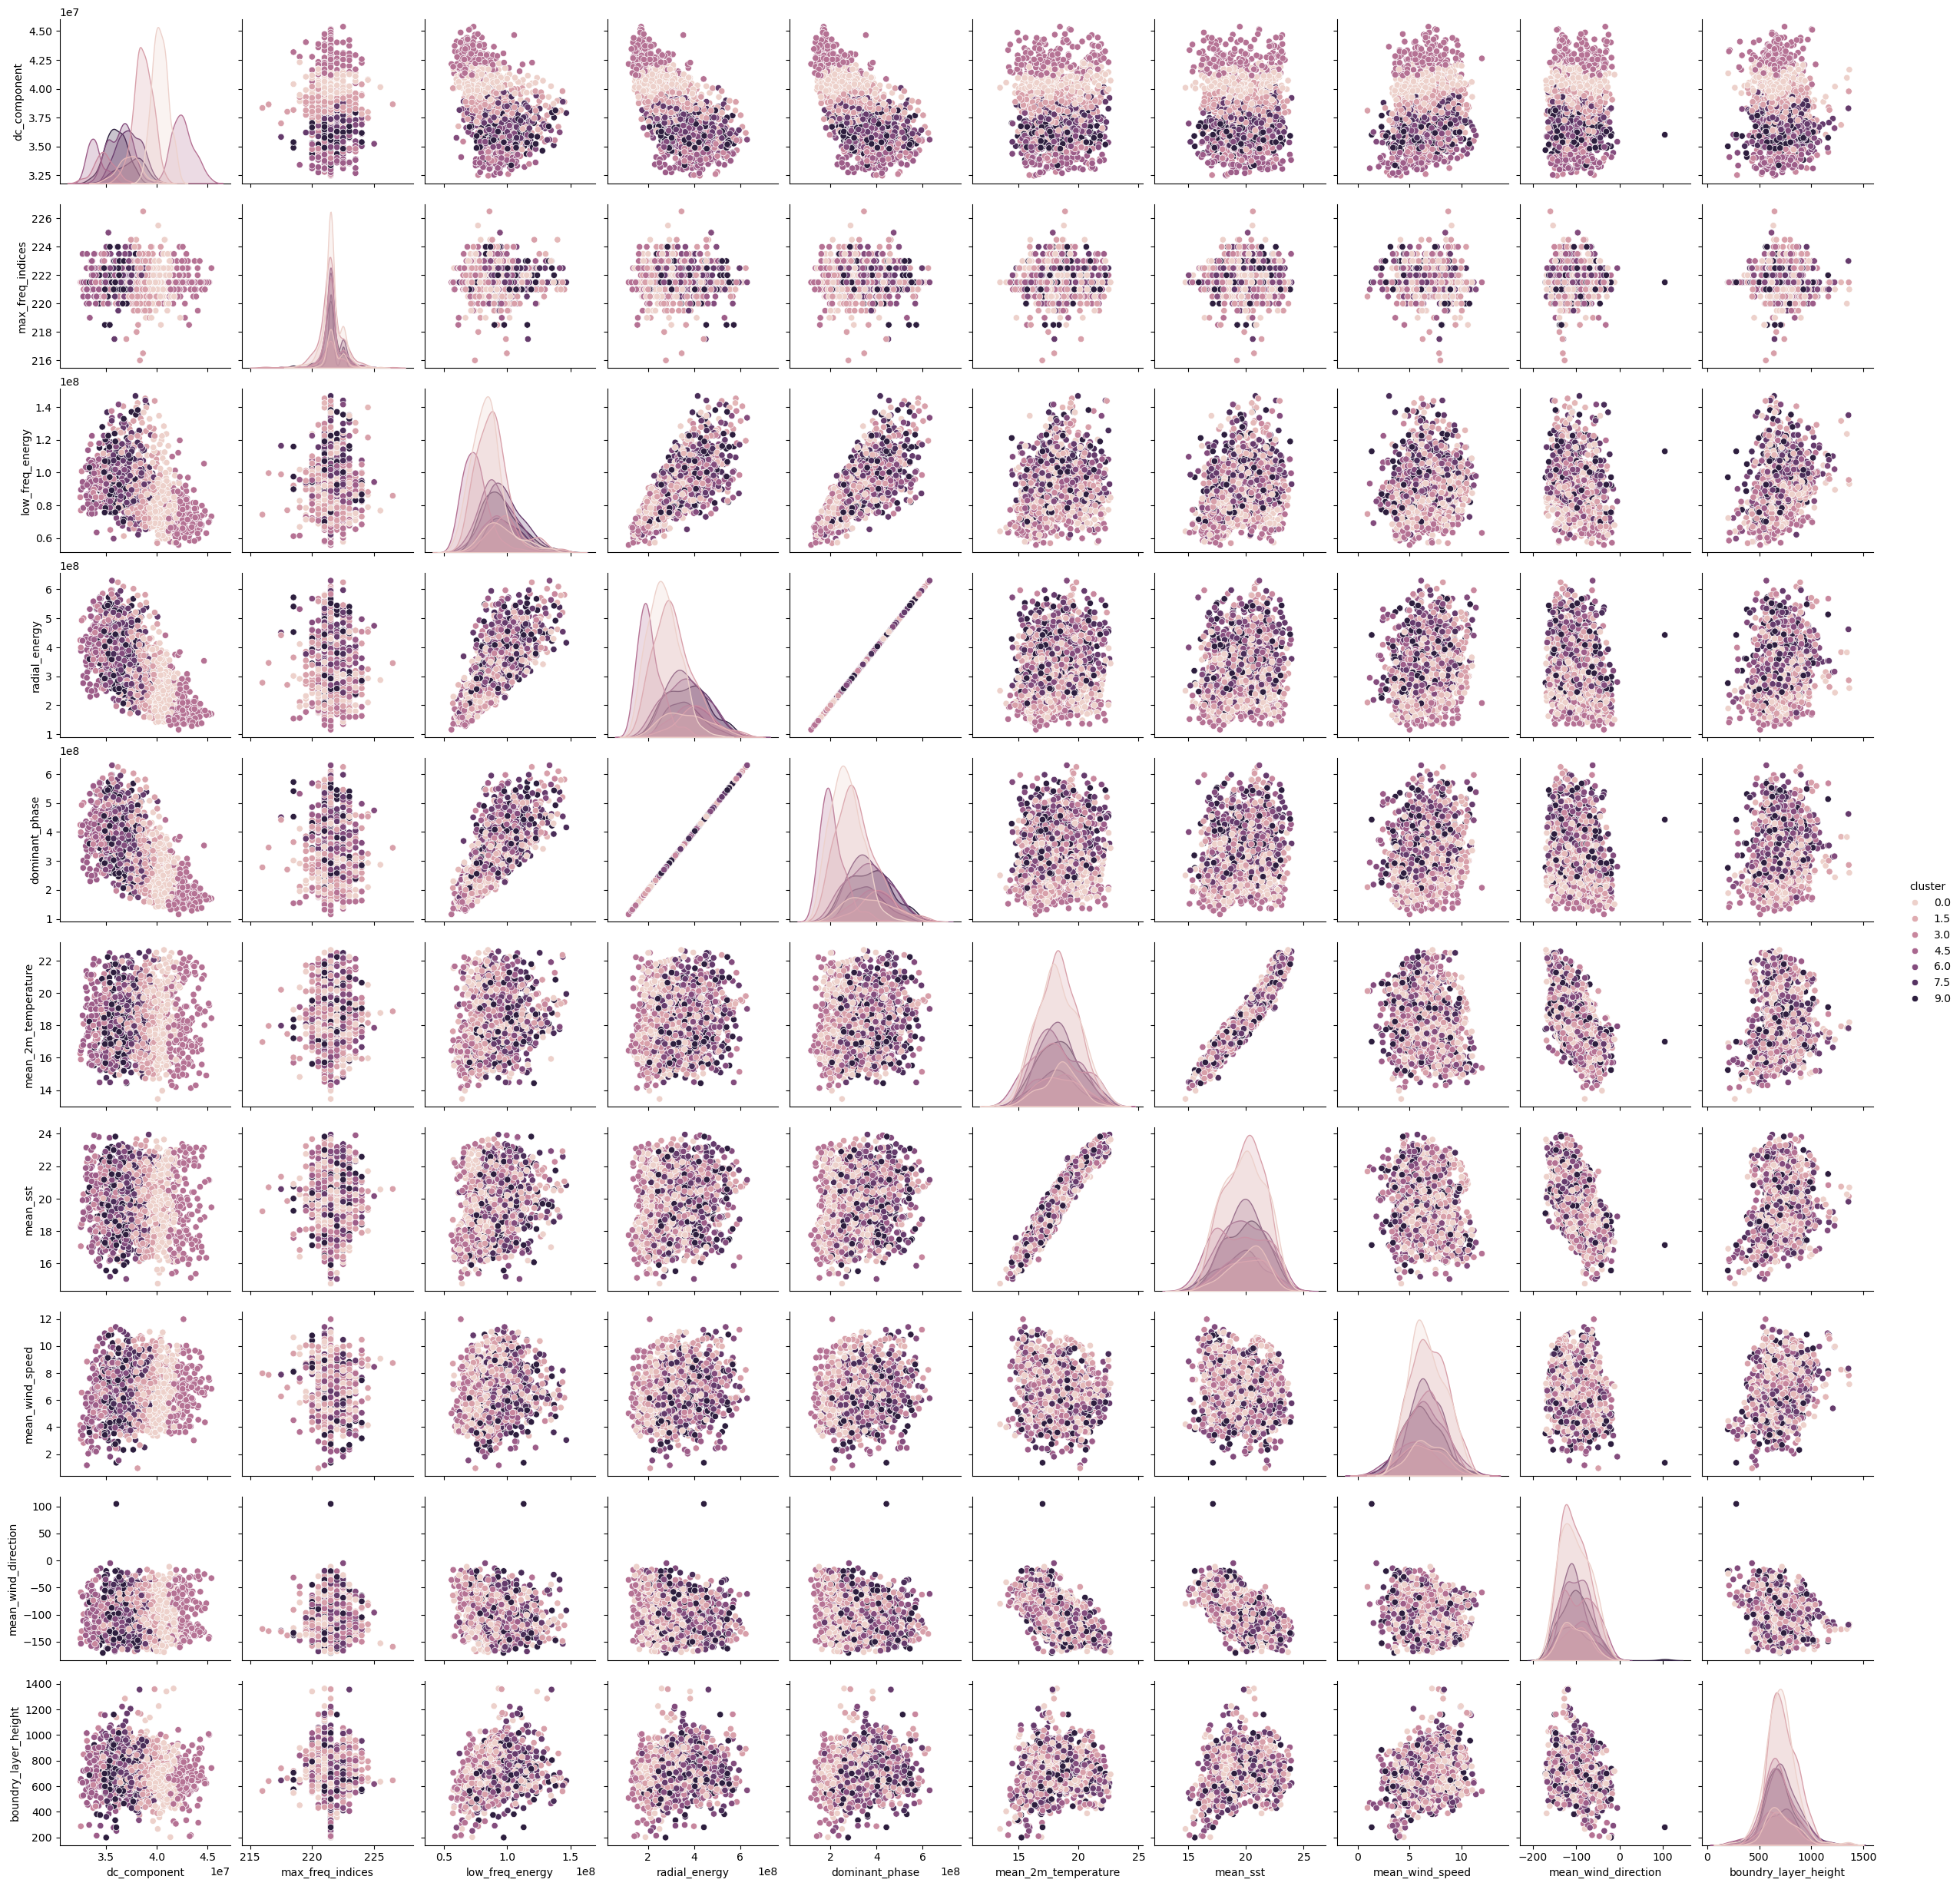

In [ ]:
rel_param = ['dc_component', 'max_freq_indices', 'low_freq_energy', 'radial_energy', 'dominant_phase', 'mean_2m_temperature', 'mean_sst', 'mean_wind_speed', 'mean_wind_direction', 'boundry_layer_height', 'total_column_cloud_liquid_water', 'area', 'cluster']
df = df[rel_param]

df_n = df[df['area'] == 'N']
df_s = df[df['area'] == 'S']

sns.pairplot(df_n, hue='cluster')

<Axes: xlabel='low_freq_energy', ylabel='mean_2m_temperature'>

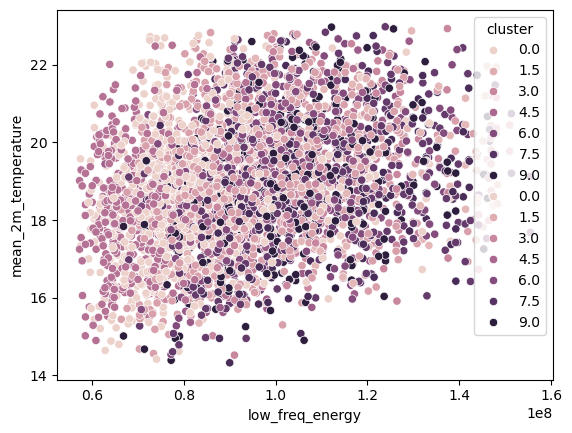

In [166]:
# le'ts check the correlation between the low_freq_energy and the mean_2m_temperature and the sst
sns.scatterplot(data=df_s, x='low_freq_energy', y='mean_2m_temperature', hue='cluster')
sns.scatterplot(data=df_s, x='low_freq_energy', y='mean_sst', hue='cluster')



In [167]:
# let's check the r value of the correlation
df_s[['low_freq_energy', 'mean_2m_temperature', 'mean_sst']].corr()

low_freq_energy  mean_2m_temperature  mean_sst
low_freq_energy             1.000000             0.290210  0.200784
mean_2m_temperature         0.290210             1.000000  0.901054
mean_sst                    0.200784             0.901054  1.000000

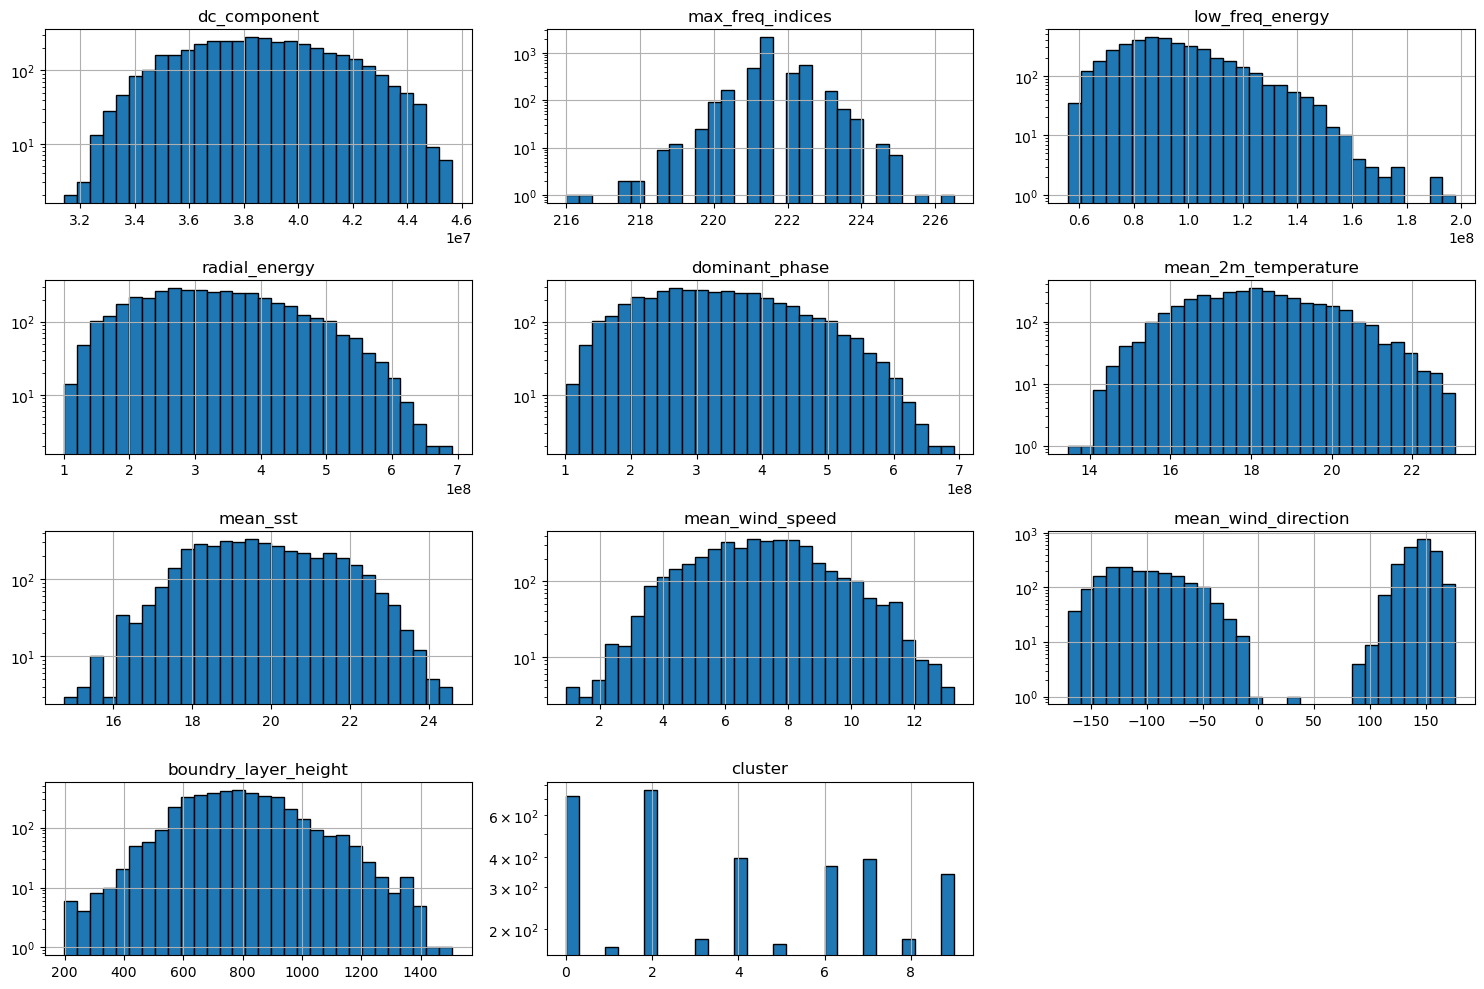

In [158]:
df.hist(figsize=(15, 10), bins=30, edgecolor='black', log='True')
plt.tight_layout()
plt.show()

In [159]:
df_n = df[df['area'] == 'N']
df_s = df[df['area'] == 'S']

In [160]:
sns.scatterplot(x=df_n['mean_temperature'], y=df_n['clouds_num']).set(xlabel='Mean Temperature')

KeyError: 'mean_temperature'

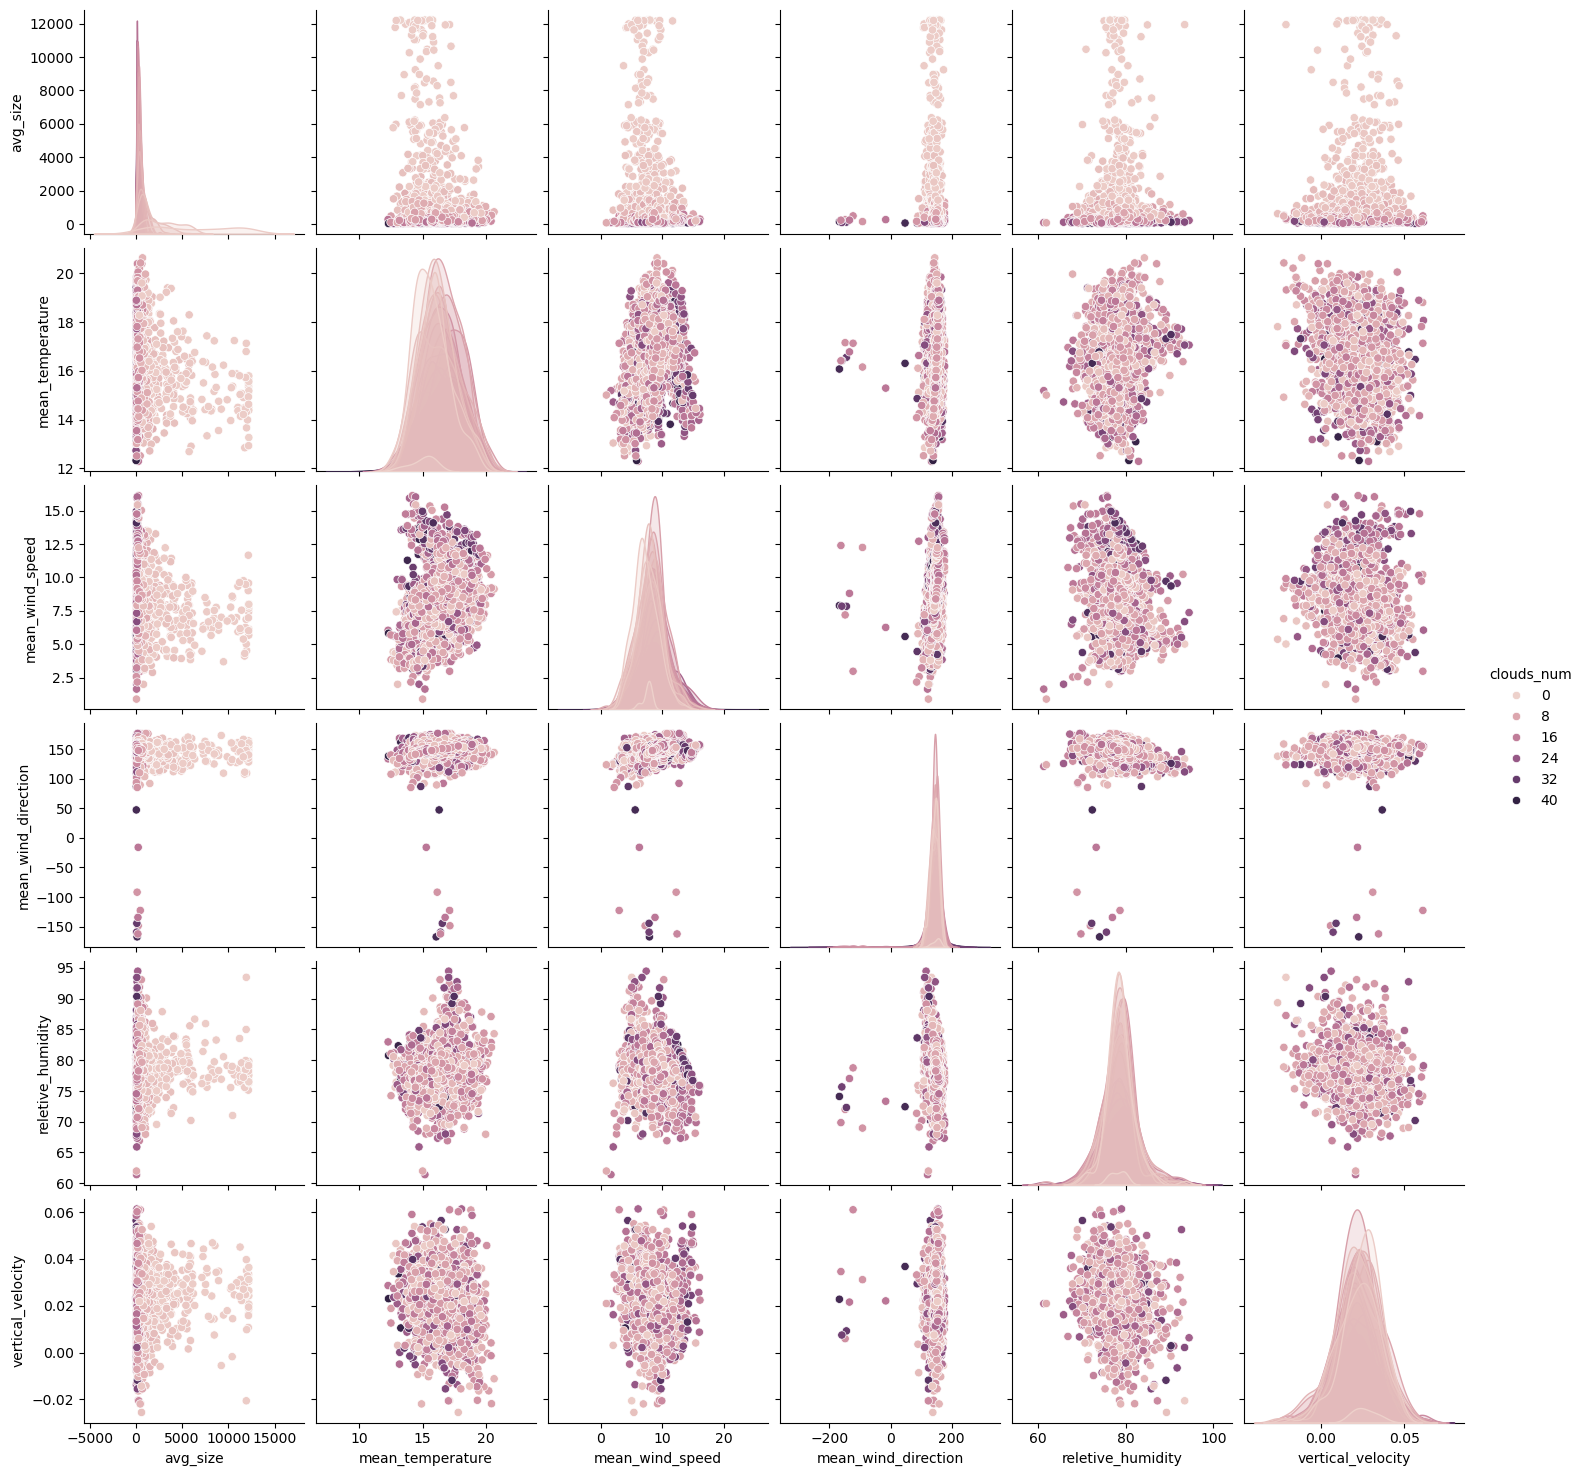

In [ ]:
pl = sns.pairplot(df_s, hue="clouds_num")
pl.savefig('savedfig_2.png')
